In [1]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head()

,bandwidth_kurtosis,bandwidth_max,bandwidth_mean,bandwidth_min,bandwidth_skew,bandwidth_std,centroid_kurtosis,centroid_max,centroid_mean,centroid_min,...,rolloff_min,rolloff_skew,rolloff_std,tempo,zcr_kurtosis,zcr_max,zcr_mean,zcr_min,zcr_skew,zcr_std
0,15.728413,3127.804419,924.022766,530.787219,3.109947,276.349377,81.652454,4152.928614,533.912001,228.475668,...,236.865234,6.623690,629.159847,143.554688,15.002529,0.146484,0.021693,0.002930,2.751115,0.012410
1,0.640590,3061.178902,1786.756940,682.002835,0.408394,396.731127,6.639450,4905.066343,1336.345127,332.349734,...,279.931641,0.842114,1461.572335,172.265625,19.538952,0.418945,0.050875,0.005859,3.218617,0.037547
2,-0.586341,3044.319037,2058.722850,1296.529066,-0.158019,284.884028,0.623761,3832.217325,1882.974111,897.011872,...,2024.121094,0.078506,948.782365,135.999178,1.413769,0.279297,0.085808,0.012695,1.005574,0.038846
3,-0.556997,3022.158360,2344.425465,1799.020763,0.267317,252.881890,0.580264,3743.754684,2190.158923,1179.204485,...,2863.916016,0.140800,843.422143,135.999178,1.581888,0.245117,0.092566,0.021484,0.867973,0.033331
4,-0.329522,2779.259953,2206.842904,1672.152918,0.105622,196.199955,-0.002103,3304.639988,2295.994755,1276.000803,...,2497.851562,-0.217421,789.671372,123.046875,-0.156643,0.230469,0.123847,0.043945,0.148016,0.029218


In [23]:
data.columns

Index(['bandwidth_kurtosis', 'bandwidth_max', 'bandwidth_mean',
       'bandwidth_min', 'bandwidth_skew', 'bandwidth_std', 'centroid_kurtosis',
       'centroid_max', 'centroid_mean', 'centroid_min',
       ...
       'rolloff_min', 'rolloff_skew', 'rolloff_std', 'tempo', 'zcr_kurtosis',
       'zcr_max', 'zcr_mean', 'zcr_min', 'zcr_skew', 'zcr_std'],
      dtype='object', length=170)

In [24]:
data.shape

(1000, 170)

In [25]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [30]:
#Use PCA to reduce feature size to 2

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1000, 169)
transformed shape: (1000, 2)


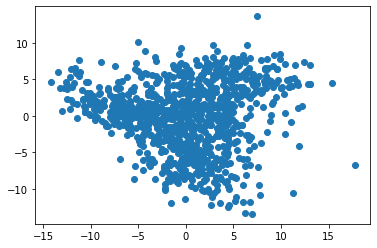

In [35]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

In [52]:
# Create a kmeans model using k = 9, for the 9 genres
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)

# Fit the model to the data
kmeans.fit(X_pca)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_pca)

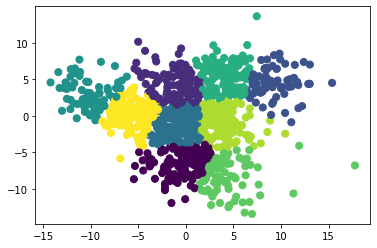

In [53]:
 # Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [54]:
 # Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_


In [58]:
centers


array([[ -0.38223242,  -6.53272715],
       [ -1.07859338,   4.28619451],
       [  9.30006043,   4.49784533],
       [ -0.7982013 ,  -1.29852104],
       [-10.08454109,   2.8567091 ],
       [  3.9995579 ,   5.44948808],
       [  4.57969804,  -8.42803185],
       [  3.96222364,  -0.83965411],
       [ -5.6353097 ,   0.15345596]])

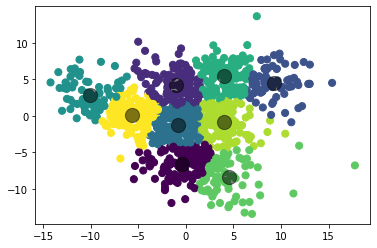

In [56]:
 plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()